# DATA PRE PROCESSING & CLASSIFICATION (GRADIENT BOOSTING)

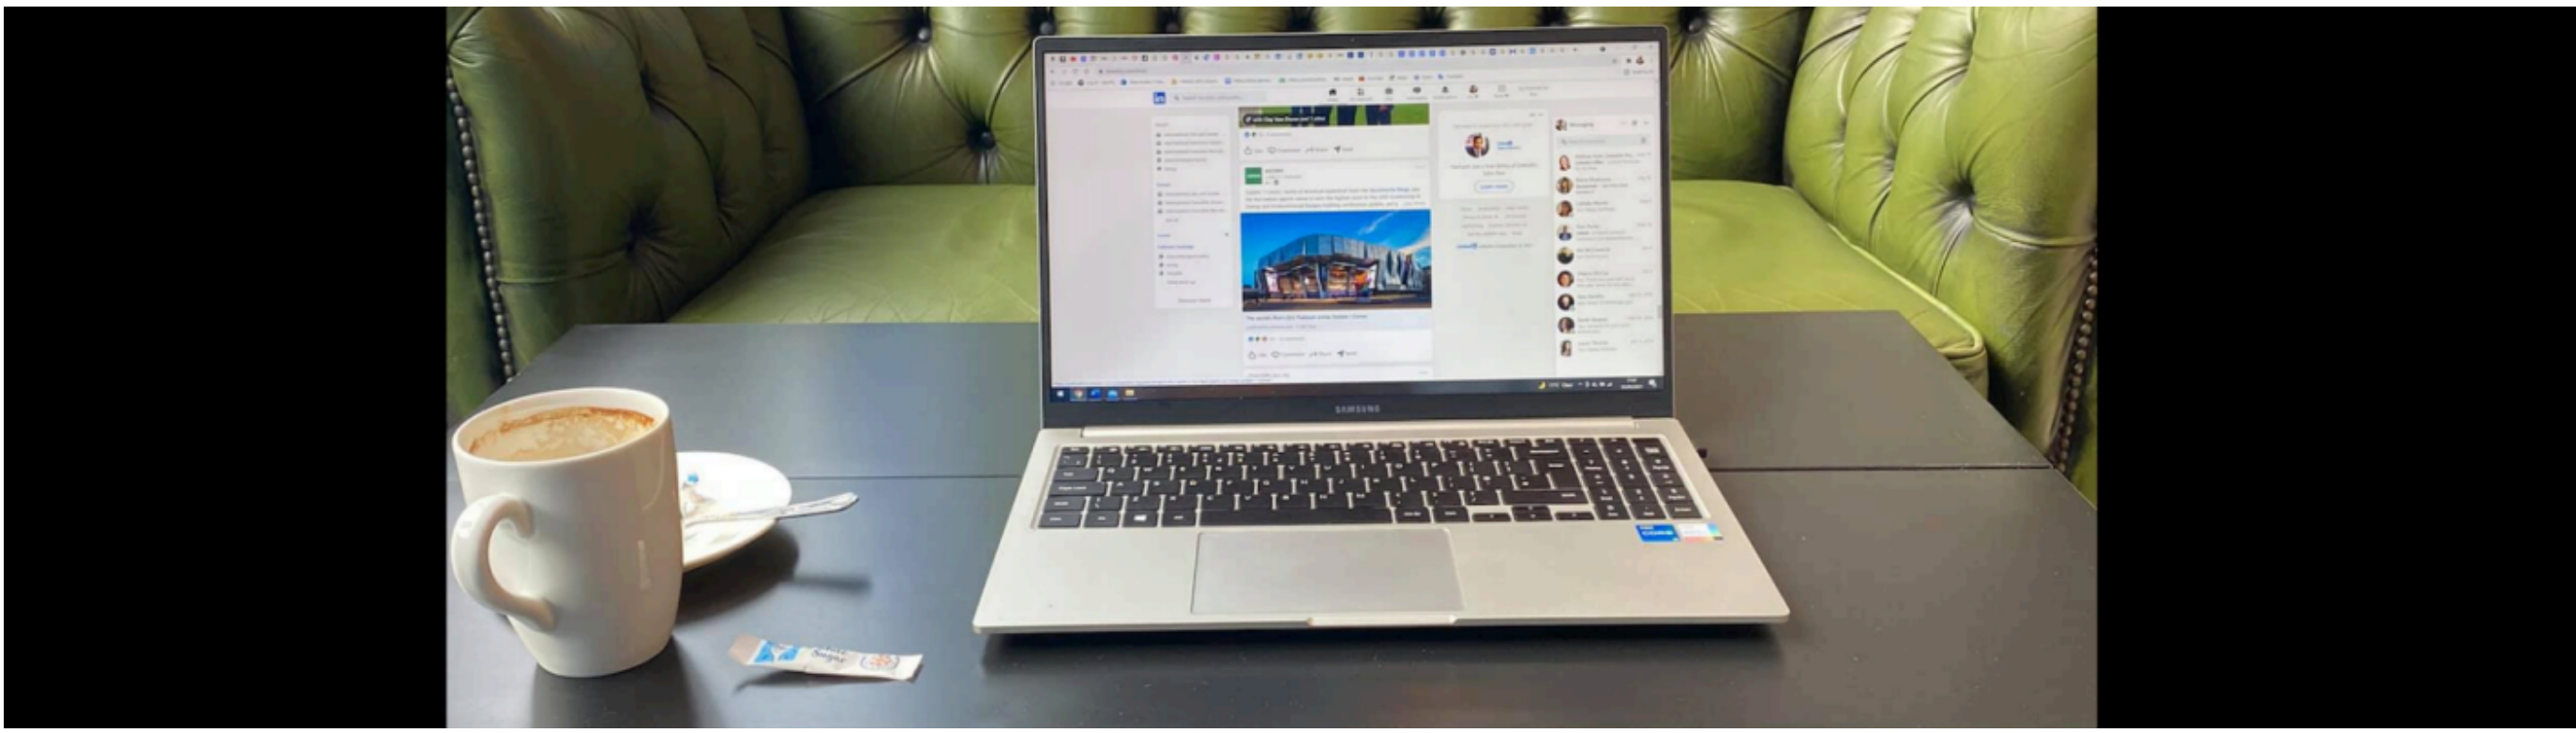

## HEMANT THAPA

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
import statistics as st
import time
import missingno as msno
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### LOADING NULL DATASET

In [3]:
df = pd.read_csv('diabetes_null.csv')

In [4]:
#checking total number of columns in datasets
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [6]:
#checking number of rows and columns of dataset
df.shape

(768, 9)

#### we have nearly about 768 rows and 9 columns

In [7]:
#cehcking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### In our dataset, we have a total of nine numerical columns, encompassing both integer and floating-point data types.

#### Specifically, we have columns of type int64 for representing whole numbers and columns of type float64 for handling decimal values.

In [8]:
#checking missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

1. "Glucose" has 5 missing values.

2. "BloodPressure" has 35 missing values.

3. "SkinThickness" has 227 missing values.

4. "Insulin" has 374 missing values.

5. "BMI" has 11 missing values.

In [9]:
#checking total missing values
#our overall missing values is 652
total_missing_vlaues = df.isnull().sum().sum()

print(f'Total missing values on dataset: {total_missing_vlaues}')

Total missing values on dataset: 652


In [10]:
# Calculate the total number of data points
total_data_points = df.size
print(f'Total numbers of data points in dataset: {total_data_points}')

Total numbers of data points in dataset: 6912


In [11]:
# Overall missing percentage
missing_percentage = total_missing_vlaues/total_data_points * 100

print(f"Overall Data Missing Percentage: {missing_percentage:.2f}%")

Overall Data Missing Percentage: 9.43%


#### Missing percentage of less than 10% is relatively low. It suggests that a significant portion of your data is still available.
  
#### In many cases, datasets with missing percentages below 10% can still be analyzed effectively without significant loss of information.

In [12]:
# Function to calculate missing values percentage for each columns
def missing_columns_percentages(df):
  #creating empty list to store missing percentage
    missing_percentages = {}
    #for loop to iterate each columns
    for i in df.columns:
        #calculating missing values of each columns
        missing_count = df[i].isnull().sum()
        #calculating the length of each columns
        total_count = len(df[i])
        #calcualting the missing percentage of each columns
        missing_percentage = (missing_count / total_count) * 100
        #storing values into empty list
        missing_percentages[i] = missing_percentage
        # Printout missing percentage
        print(f"Missing Percentage for '{i}': {missing_percentage:.2f}%")


In [13]:
missing_percentages = missing_columns_percentages(df)

Missing Percentage for 'Pregnancies': 0.00%
Missing Percentage for 'Glucose': 0.65%
Missing Percentage for 'BloodPressure': 4.56%
Missing Percentage for 'SkinThickness': 29.56%
Missing Percentage for 'Insulin': 48.70%
Missing Percentage for 'BMI': 1.43%
Missing Percentage for 'DiabetesPedigreeFunction': 0.00%
Missing Percentage for 'Age': 0.00%
Missing Percentage for 'Outcome': 0.00%


In [14]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print('Missing percentage according to columns: ')
print(missing_percentages)

Missing percentage according to columns: 
Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


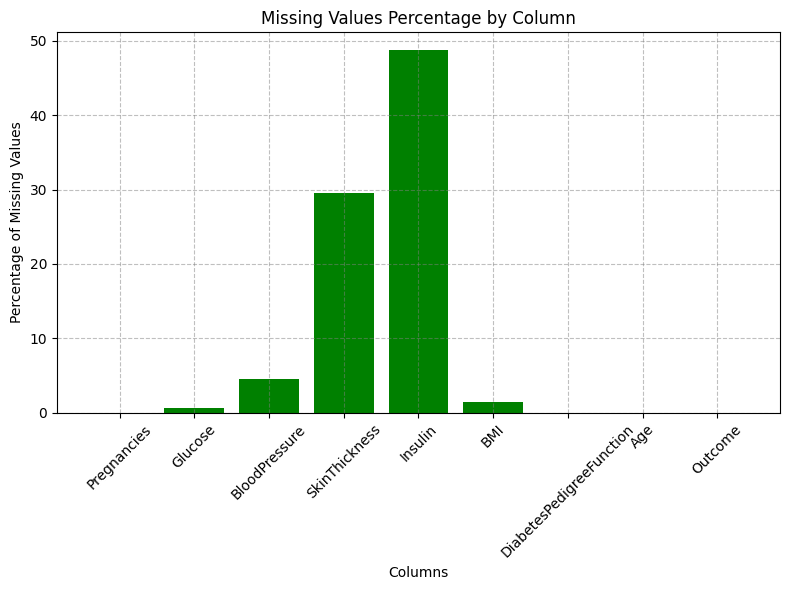

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(missing_percentages.index, missing_percentages, color='green')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Percentage by Column')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

#### The column with the highest percentage of missing values is "Insulin" with 48.70% & Skin Thickness with 29.55% missing data.

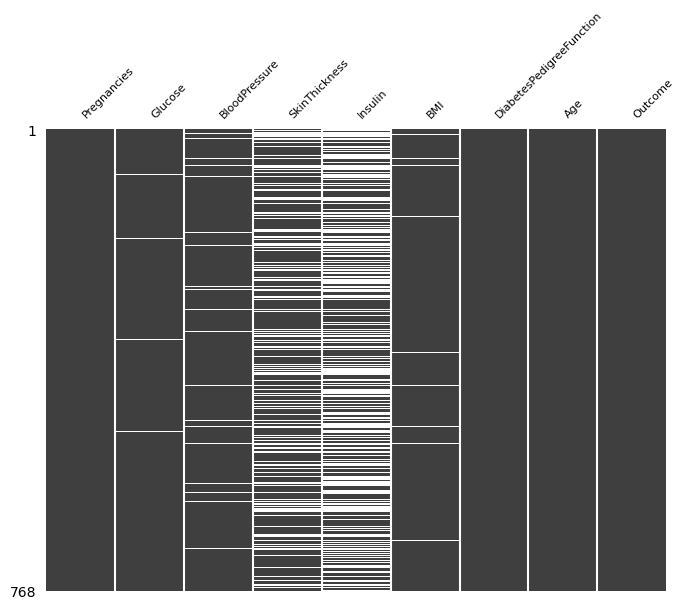

In [16]:
#Chefcking missing values using missingo
fig, ax = plt.subplots(figsize=(8, 6))
msno.matrix(df, ax=ax, fontsize=8)
plt.show()

### HISTOGRAMS FOR CHECKING FREQUENCY DISTRIBUTION

In [17]:
#selecting int and float columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

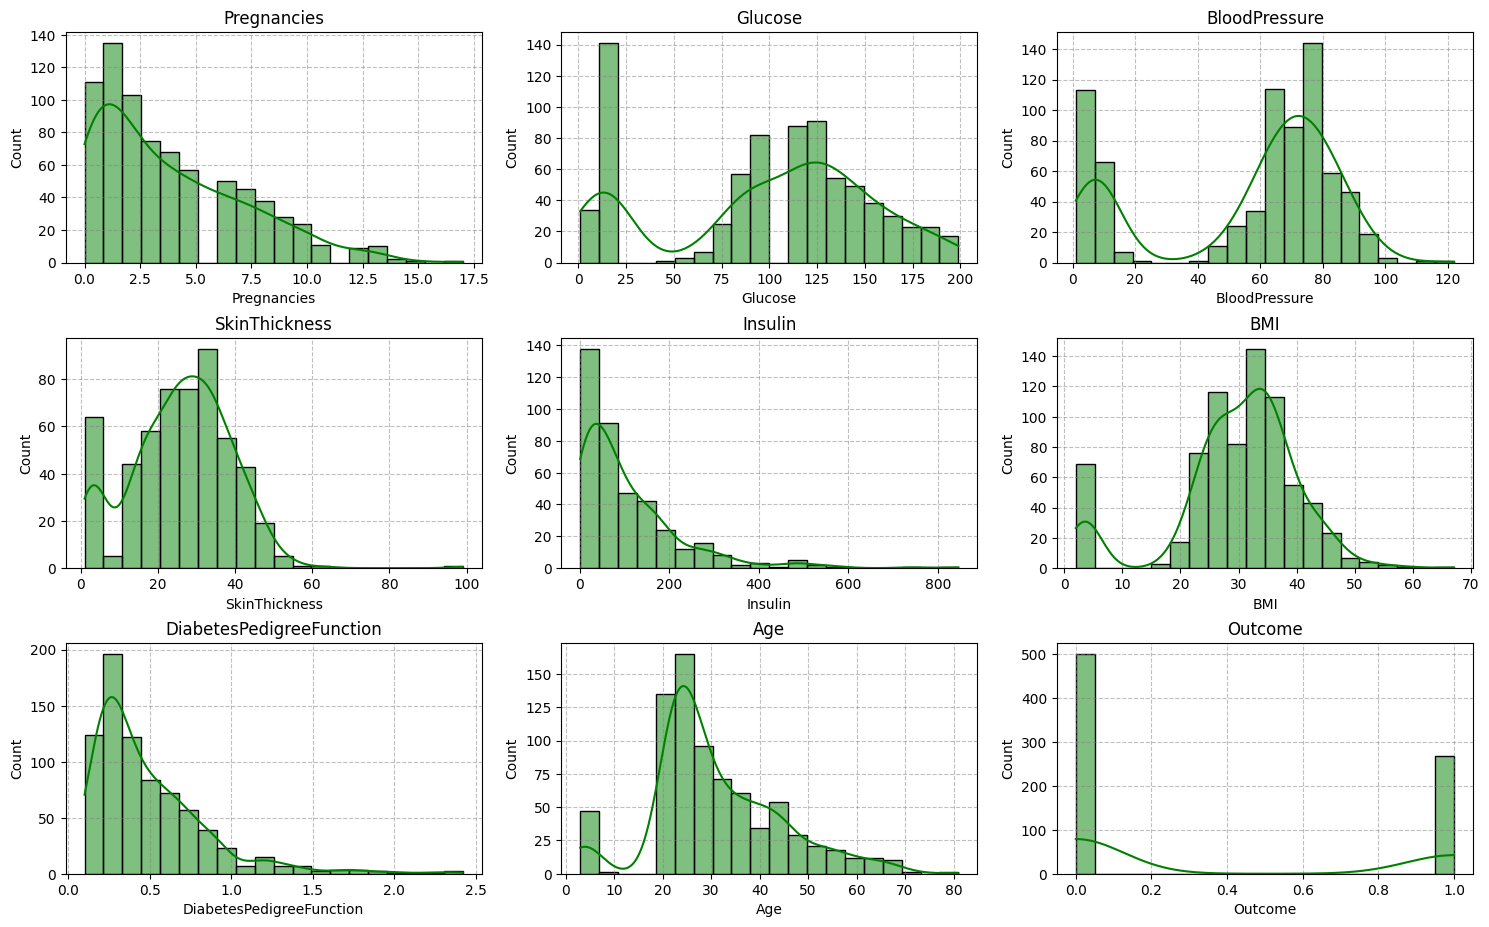

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
# Histograms and density plots for each numeric column
for i, column in enumerate(numeric_columns.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=df, x=column, kde=True, bins=20, color='green', edgecolor='black', ax=ax)
    ax.set_title(column)
    ax.grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

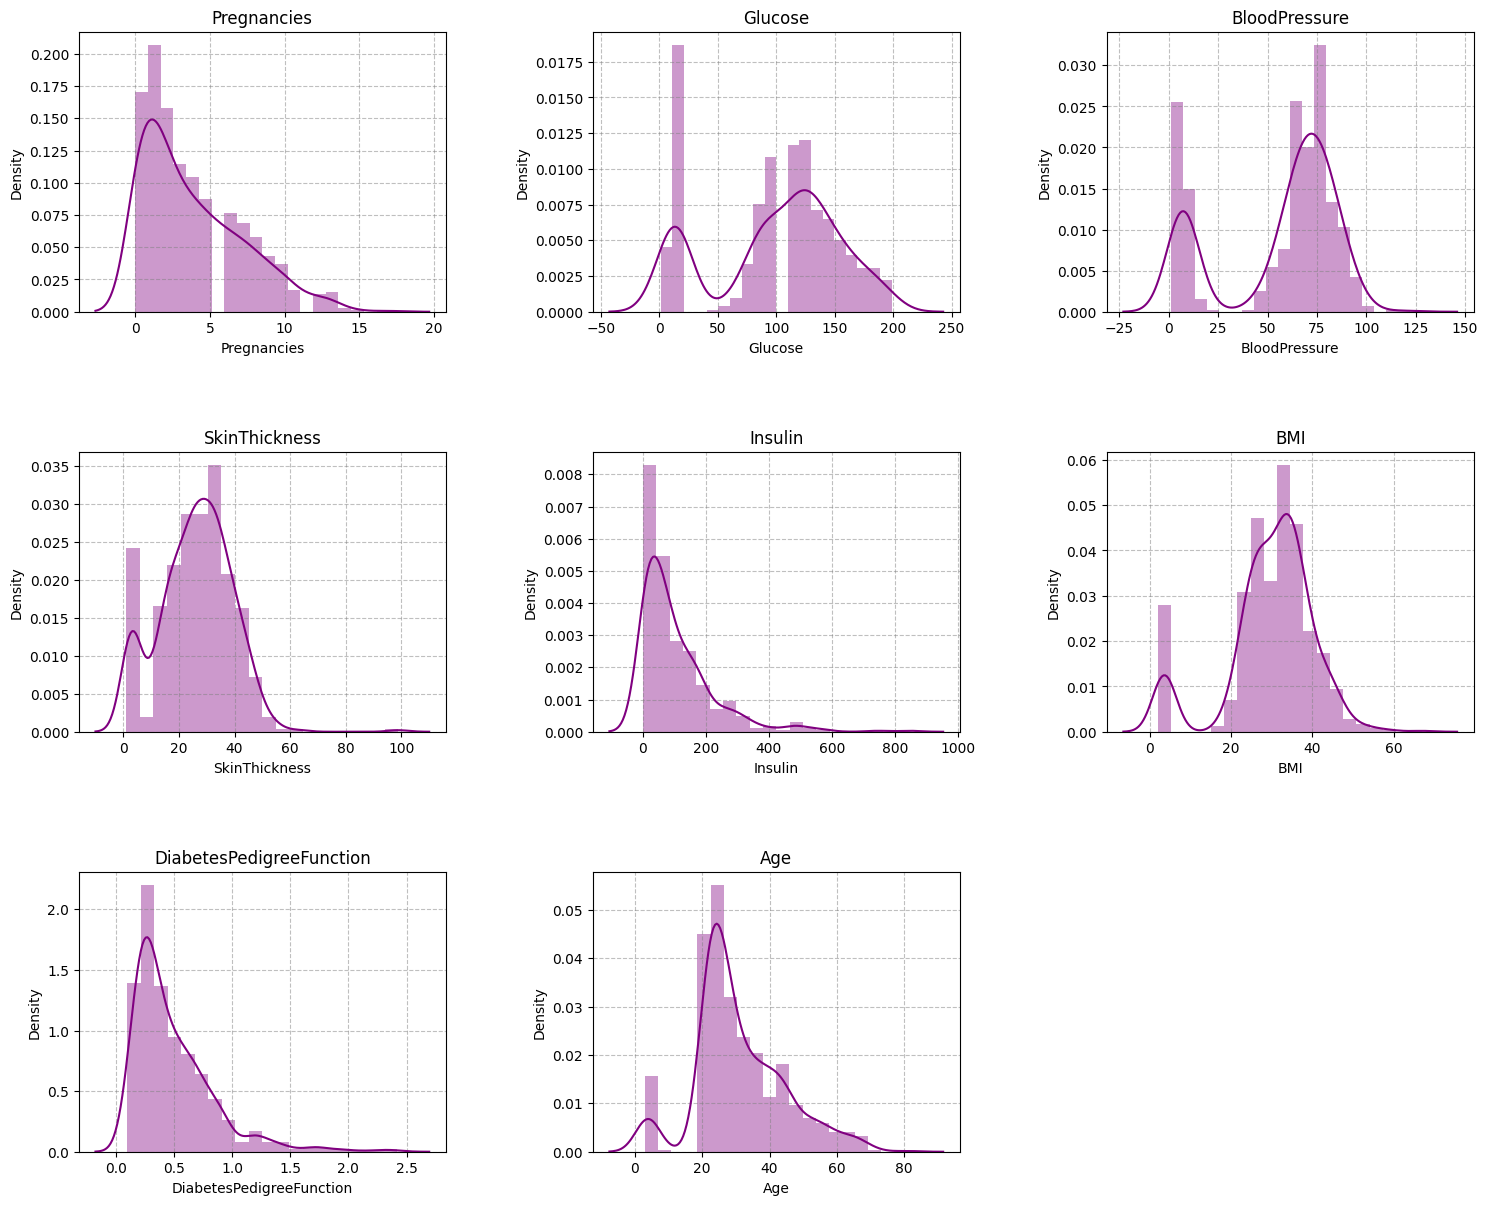

In [19]:
warnings.filterwarnings("ignore")
columns = df.columns[:8]
plt.subplots(figsize=(18, 20))
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot(int(length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=.4, hspace=.5)
    sns.distplot(df[i], bins=20, color='purple')
    plt.grid(True, ls='--', c='grey', alpha=0.5)
    plt.title(i)
plt.show()

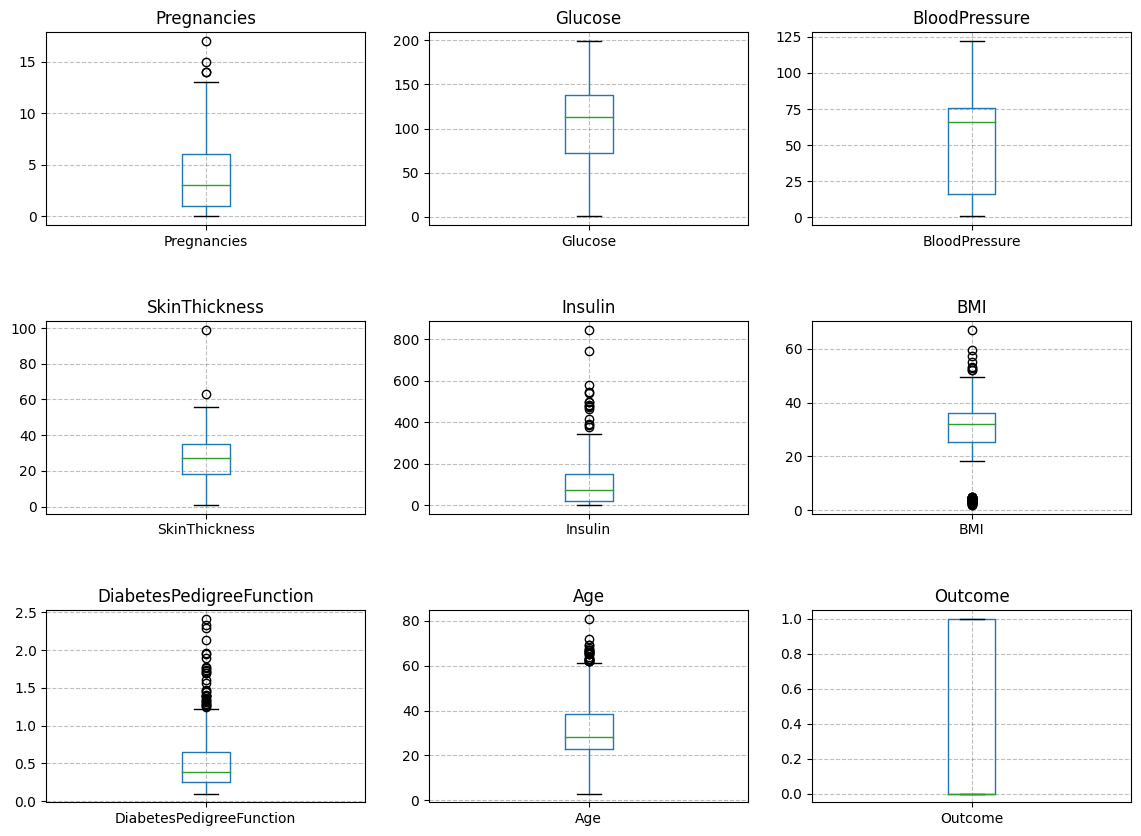

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)  
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    df.boxplot(column=col, ax=ax, showfliers=True)
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)  
    ax.set_title(col)
plt.show()

### CLASS TO CHECK KARL PEARSON COEFFICIENT 

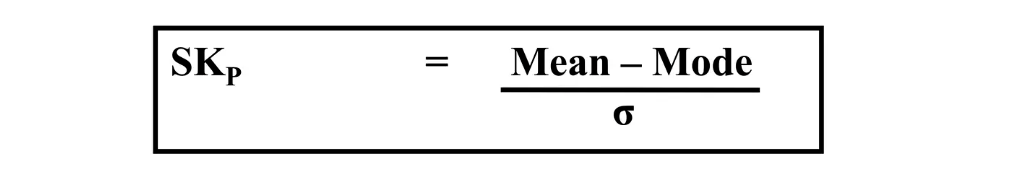

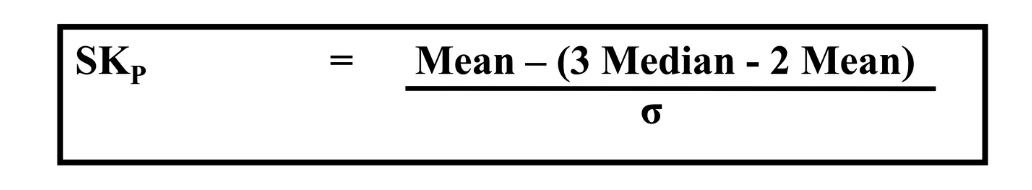

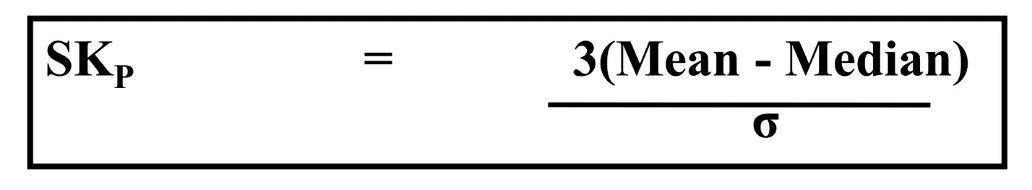

In [21]:
class KarlPearsonCoefficient:
    """
    Class for calculating and interpreting skewness of a data column.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: Name of the column for which skewness will be calculated.

    Note: If this value is between:
    · -0.5 and 0.5, the distribution of the value is almost symmetrical
    · -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed.
    · If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
    """
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name

    def calculate_skewness(self):
        #skewness using Pearson’s median skewness formula
        mean = self.data[self.column_name].mean()
        median = self.data[self.column_name].median()
        mode = self.data[self.column_name].mode().iloc[0]  # Get the first mode if it exists
        print('Mean: ',mean)
        print('Median: ',median)
        print('Mode: ',mode)

        #skewness using the Pearson's median formula
        pearson_skewness = (3 * (mean - median)) / self.data[self.column_name].std()
        return pearson_skewness

    def interpret_skewness(self, skewness_value):
        #skewness based on your conditions
        if skewness_value > 1:
            skewness_result = "Highly positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif 0.5 <= skewness_value <= 1:
            skewness_result = "Positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif skewness_value < -1:
            skewness_result = "Highly negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif -1 <= skewness_value <= -0.5:
            skewness_result = "Negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        else:
            skewness_result = "No skew (symmetric distribution)"
            print("Interpretation of skewness:", skewness_result)

        return skewness_result

    def analyse_skewness(self):
        #skewness using Pearson's median skewness formula
        pearson_skewness = self.calculate_skewness()

        # Interpret the skewness
        self.interpret_skewness(pearson_skewness)

        print(f'Pearson Skewness : {pearson_skewness}')

### SIMPLE IMPUTER

In [22]:
#using simple imputer for mean and median imputation
from sklearn.impute import SimpleImputer

In [23]:
#setting simple imputation for mean 
imputer_mean = SimpleImputer(strategy='mean')

In [24]:
#duplicating dataframe
df2 = df.copy()

### GLUCOSE IMPUTATION

In [25]:
#cjecking null values in gulcose columns
df2['Glucose'].isnull().sum()

5

In [26]:
#Seprating data with respect to outcome '0' & '1', where 0 is for diabetes and 1 for non diabetes
df_glucose_zero = df[df['Outcome'] == 0]['Glucose'].values.reshape(-1, 1)
df_glucose_one = df[df['Outcome'] == 1]['Glucose'].values.reshape(-1, 1)

In [27]:
#Imputation of mean values for Glucose column
df2.loc[df2['Outcome'] == 0, 'Glucose'] = imputer_mean.fit_transform(df_glucose_zero)
df2.loc[df2['Outcome'] == 1, 'Glucose'] = imputer_mean.fit_transform(df_glucose_one)

In [28]:
#Verification of null values in Glucose column
df2['Glucose'].isnull().sum().sum()

0

#### BLOOD PRESSURE IMPUTATION

In [29]:
#checking null values in 'BloodPressure' columns
df2['BloodPressure'].isnull().sum()

35

In [30]:
#Seprating data with respect to outcome '0' & '1', where 0 is for diabetes and 1 for non diabetes
df_bp_zero = df[df['Outcome'] == 0]['BloodPressure'].values.reshape(-1, 1)
df_bp_one = df[df['Outcome'] == 1]['BloodPressure'].values.reshape(-1, 1)

In [31]:
#Imputation of mean values for Blood Pressure column
df2.loc[df2['Outcome'] == 0, 'BloodPressure'] = imputer_mean.fit_transform(df_bp_zero)
df2.loc[df2['Outcome'] == 1, 'BloodPressure'] = imputer_mean.fit_transform(df_bp_one)

In [32]:
df2['BloodPressure'].isnull().sum()

0

#### SKIN THICKNESS

In [33]:
#checking null value sin 'SkinThickness' columns
df2['SkinThickness'].isnull().sum()

227

In [34]:
columns_name = df.columns
columns_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
columns_name[3]

'SkinThickness'

In [36]:
skewness_calculator = KarlPearsonCoefficient(df, columns_name[3])
skewness_calculator.analyse_skewness()

Mean:  25.87615526802218
Median:  27.0
Mode:  32.0
Interpretation of skewness: No skew (symmetric distribution)
Pearson Skewness : -0.2599924364016548


In [37]:
#Seprating data with respect to outcome '0' & '1', where 0 is for diabetes and 1 for non diabetes
df_skinthickness_zero = df[df['Outcome'] == 0]['SkinThickness'].values.reshape(-1, 1)
df_skinthickness_one = df[df['Outcome'] == 1]['SkinThickness'].values.reshape(-1, 1)

In [38]:
#Imputation of mean values for SkinThickness column
df2.loc[df2['Outcome'] == 0, 'SkinThickness'] = imputer_mean.fit_transform(df_skinthickness_zero)
df2.loc[df2['Outcome'] == 1, 'SkinThickness'] = imputer_mean.fit_transform(df_skinthickness_one)

In [39]:
df2['SkinThickness'].isnull().sum()

0

### INSULIN

In [40]:
df2['Insulin'].isnull().sum()

374

In [41]:
columns_name = df.columns
columns_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
columns_name[4]

'Insulin'

In [43]:
skewness_calculator = KarlPearsonCoefficient(df, columns_name[4])
skewness_calculator.analyse_skewness()

Mean:  105.65989847715736
Median:  71.0
Mode:  15.0
Interpretation of skewness: Positively skewed
Pearson Skewness : 0.8897609409409253


In [44]:
#Creating median imputation for positive skewed columns
imputer_median = SimpleImputer(strategy='median')

In [45]:
#Seprating data with respect to outcome '0' & '1', where 0 is for diabetes and 1 for non diabetes
df_insulin_zero = df[df['Outcome'] == 0]['Insulin'].values.reshape(-1, 1)
df_insulin_one = df[df['Outcome'] == 1]['Insulin'].values.reshape(-1, 1)

In [46]:
#Imputation of mean values for Insulin column
df2.loc[df2['Outcome'] == 0, 'Insulin'] = imputer_mean.fit_transform(df_insulin_zero)
df2.loc[df2['Outcome'] == 1, 'Insulin'] = imputer_mean.fit_transform(df_insulin_one)

In [47]:
df2['Insulin'].isnull().sum()

0

### BMI

In [48]:
#Seprating data with respect to outcome '0' & '1', where 0 is for diabetes and 1 for non diabetes
df_bmi_zero = df[df['Outcome'] == 0]['BMI'].values.reshape(-1, 1)
df_bmi_one = df[df['Outcome'] == 1]['BMI'].values.reshape(-1, 1)

In [49]:
#Imputation of mean values for Insulin column
df2.loc[df2['Outcome'] == 0, 'BMI'] = imputer_mean.fit_transform(df_bmi_zero)
df2.loc[df2['Outcome'] == 1, 'BMI'] = imputer_mean.fit_transform(df_bmi_one)

In [50]:
df2['BMI'].isnull().sum()

0

### DATA VISUALISATION

#### CORRLATION ANALYSIS USING HEAT MAP

In [51]:
#checking correlation between features
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.072709,0.073651,0.062562,0.062188,-0.009108,-0.049491,0.405498,0.221898
Glucose,0.072709,1.000000,0.005952,0.169591,0.247807,0.076732,0.043832,0.075912,0.310235
BloodPressure,0.073651,0.005952,1.000000,-0.004952,-0.029145,-0.016834,0.016206,0.057488,0.025090
SkinThickness,0.062562,0.169591,-0.004952,1.000000,0.138980,0.216404,0.104890,0.075614,0.296316
Insulin,0.062188,0.247807,-0.029145,0.138980,1.000000,-0.024965,0.138889,0.042718,0.289227
BMI,-0.009108,0.076732,-0.016834,0.216404,-0.024965,1.000000,0.041838,0.024065,0.187037
DiabetesPedigreeFunction,-0.049491,0.043832,0.016206,0.104890,0.138889,0.041838,1.000000,0.065132,0.151608
Age,0.405498,0.075912,0.057488,0.075614,0.042718,0.024065,0.065132,1.000000,0.175860
Outcome,0.221898,0.310235,0.025090,0.296316,0.289227,0.187037,0.151608,0.175860,1.000000


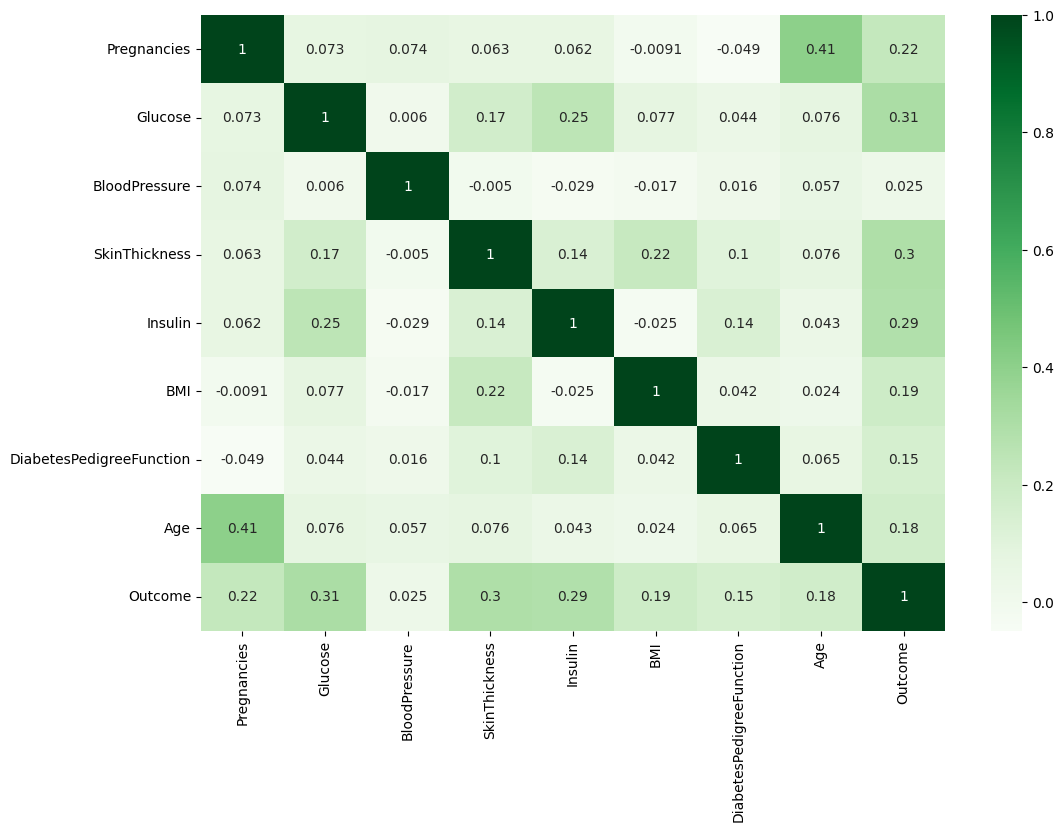

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.Greens);

In [53]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

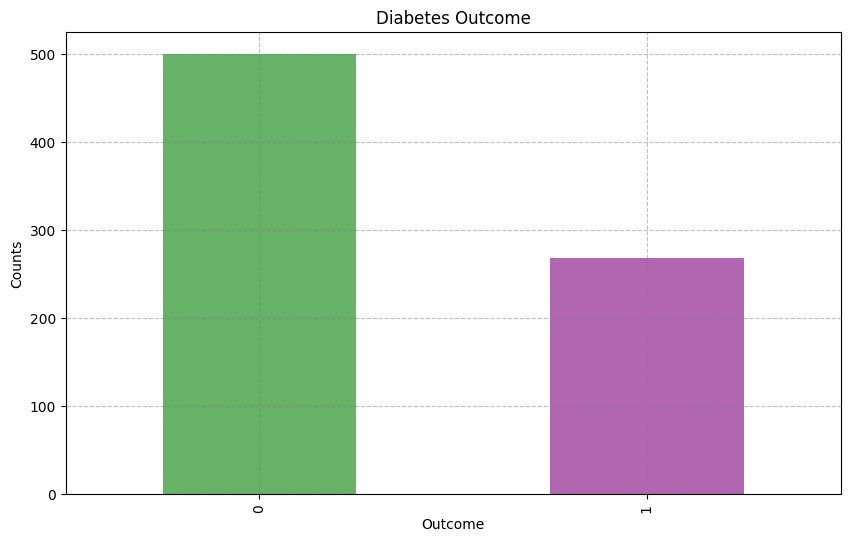

In [54]:
colors= ['green', 'purple']
plt.figure(figsize=(10,6))
df['Outcome'].value_counts().plot(kind='bar', color=colors, alpha=0.6)
plt.grid(True, ls='--', c='grey', alpha=0.5)
plt.title('Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

Nearly around 268 peoples have diabetes, and similary 500 people dont have diabetes.

In [55]:
diabetes_peoples = df['Outcome'].value_counts()[1]
non_diabetes_peoples = df['Outcome'].value_counts()[0]

In [56]:
print(f'Percentage of diabetes peoples: {diabetes_peoples/ (diabetes_peoples + non_diabetes_peoples) * 100:.2f} %')

Percentage of diabetes peoples: 34.90 %


### FEATURES SELECTION

In [57]:
#Selecting columns for creating features
colummns = df.columns[0:8].values
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [58]:
#Independent variables
X = df2[columns]

In [59]:
X[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,140.384615,33.6,0.627,5
1,1,85.0,66.0,29.00,88.560606,26.6,0.351,31
2,8,183.0,64.0,30.45,140.384615,23.3,0.672,32
3,1,89.0,66.0,23.00,94.000000,28.1,0.167,21
4,0,137.0,4.0,35.00,168.000000,43.1,2.288,33


In [60]:
#Changing 1 dimensional to 2 dimensional
X = X.values.reshape(-8,8)

In [61]:
X[:5]

array([[6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
        1.40384615e+02, 3.36000000e+01, 6.27000000e-01, 5.00000000e+00],
       [1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
        8.85606061e+01, 2.66000000e+01, 3.51000000e-01, 3.10000000e+01],
       [8.00000000e+00, 1.83000000e+02, 6.40000000e+01, 3.04500000e+01,
        1.40384615e+02, 2.33000000e+01, 6.72000000e-01, 3.20000000e+01],
       [1.00000000e+00, 8.90000000e+01, 6.60000000e+01, 2.30000000e+01,
        9.40000000e+01, 2.81000000e+01, 1.67000000e-01, 2.10000000e+01],
       [0.00000000e+00, 1.37000000e+02, 4.00000000e+00, 3.50000000e+01,
        1.68000000e+02, 4.31000000e+01, 2.28800000e+00, 3.30000000e+01]])

In [62]:
#predicter or dependent variables
y = df['Outcome'].values

In [63]:
y[:20]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

### FEATURES SCALING 

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
#creating scaler model
scaler = MinMaxScaler()

In [66]:
#converting features into scaler values
X_scaled = scaler.fit_transform(X)

In [67]:
X_scaled[:5]

array([[0.35294118, 0.74242424, 0.58677686, 0.34693878, 0.16495221,
        0.48540707, 0.22715517, 0.02564103],
       [0.05882353, 0.42424242, 0.53719008, 0.28571429, 0.10362202,
        0.37788018, 0.10818966, 0.35897436],
       [0.47058824, 0.91919192, 0.52066116, 0.3005102 , 0.16495221,
        0.32718894, 0.24655172, 0.37179487],
       [0.05882353, 0.44444444, 0.53719008, 0.2244898 , 0.11005917,
        0.40092166, 0.02887931, 0.23076923],
       [0.        , 0.68686869, 0.02479339, 0.34693878, 0.19763314,
        0.63133641, 0.94310345, 0.38461538]])

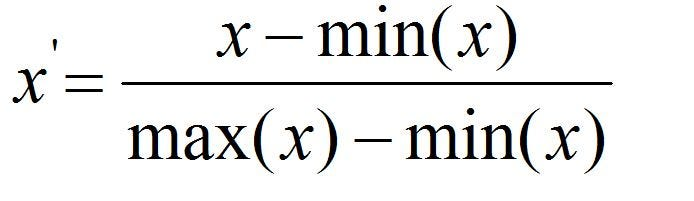

#### When you have features with different units: 

If your dataset includes features with different units or measurement scales (e.g., age in years and income in dollars), Min-Max scaling can help bring all features to a common scale, making them directly comparable.

### TRAIN TEST SPLIT 

In [68]:
#checking dimension of features and target
print(f'Dimension of features: {X_scaled.ndim}D')
print(f'Dimension of target: {y.ndim}D')

Dimension of features: 2D
Dimension of target: 1D


In [69]:
#checking shape of features and target
print("Shape of X:", X_scaled.shape)
print("Shape of y:", y.shape)

Shape of X: (768, 8)
Shape of y: (768,)


In [70]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.80, random_state=0)

### MODEL SELECTION 

#### NOW, WE GONNA TEST MULTIPLE CLASSIFICATION MODEL FOR SELECTING BEST MODEL

In [71]:
#Classifiers with default hyperparameters
classifiers = {
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(),
}

### HYPER PARAMETERS

##### NOW, WE HAVE CREATED HYPER PARAMETERS FOR CLASSIFICATION MODEL ACCORDING TO THEIR NEEDS, WHERE MODEL WILL GO THROUGH EACH PARAMETERS AT A TIME TO CALCUALTE 
##### ACCURACY, PRECISION, RECALL, F1, ROC AUC AND FITTING TIME

In [72]:
# Hyperparameters and their possible values for grid search for each algorithm
param_grids = {
    "Naive Bayes": {}, 
    "k-NN": {
        "n_neighbors": [3, 5, 7, 10, 15],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "leaf_size": [10, 20, 30],
        "p": [1, 2, 3, 4, 5],  
        "metric": ["euclidean", "manhattan", "minkowski"],  
    },
    "Decision Tree": {
        "max_depth": [3, 5, 7, 10, 15],
        "min_samples_split": [2, 5, 10, 15],
        "min_samples_leaf": [1, 2, 4, 6],
        "max_features": ["auto", "sqrt", "log2"],
        "criterion": ["gini", "entropy"],
    },
    "Random Forest": {
        "n_estimators": [10, 50, 100, 200, 300],
        "max_depth": [3, 5, 7, 10, 15],
        "min_samples_split": [2, 5, 10, 15],
        "min_samples_leaf": [1, 2, 4, 6],
        "max_features": ["auto", "sqrt", "log2"],
        "bootstrap": [True, False],
        "criterion": ["gini", "entropy"],
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.5, 1.0],
        "max_depth": [3, 5, 7, 10, 15],
        "subsample": [0.8, 0.9, 1.0],
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.5, 1.0],
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "degree": [2, 3, 4],
        "gamma": ["scale", "auto", 0.1, 1, 10],
    },
    "MLP": {
        "hidden_layer_sizes": [(100,), (50, 50), (30, 20, 10)],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs", "sgd", "adam"],
        "alpha": [0.0001, 0.001, 0.01],
    },
}

In [73]:
#empty list to store results
results = []

# Loop through each classifier and its hyperparameters
for i, (classifier_name, classifier) in enumerate(classifiers.items(), start=0): 
    # Define the hyperparameters and their possible values for grid search
    param_grid = param_grids[classifier_name]
    
    # Loop through hyperparameters and their possible values
    for j, (param_name, param_values) in enumerate(param_grid.items(), start=0): 
        # Loop through possible values of each hyperparameter
        for k, param_value in enumerate(param_values, start=1): 
            # Perform grid search for the classifier and measure time
            start_time = time.time()
            grid_search = GridSearchCV(classifier, {param_name: [param_value]}, cv=5, scoring='accuracy')
            grid_search.fit(X_train, y_train) 
            end_time = time.time()
            
            # Print the best hyperparameters for the classifier
            best_model = grid_search.best_estimator_
            print(f"Index: {i}, Classifier: {classifier_name}, Hyperparameter: {param_name}, Value: {param_value}")
            print(f"Best hyperparameters for Classifier {i} ({classifier_name}), Hyperparameter {j} ({param_name}), Value {k} ({param_value}):")
            print(best_model)
            
            # Print the fitting time for the classifier
            elapsed_time = end_time - start_time
            print(f"Classifier {i} ({classifier_name}) took {elapsed_time:.2f} seconds to fit.")
            print()
            
            # Use the best model to make predictions on the test data
            y_pred = best_model.predict(X_test)
            
            # Calculate the evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            
            # dictionary to store the results for this configuration
            result_dict = {
                'Index': i,
                'Classifier': classifier_name,
                'Hyperparameter': param_name,
                'Hyperparameter Value': param_value,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'ROC AUC': roc_auc,
                'Fitting Time (s)': elapsed_time 
            }
            
            results.append(result_dict)


Index: 1, Classifier: k-NN, Hyperparameter: n_neighbors, Value: 3
Best hyperparameters for Classifier 1 (k-NN), Hyperparameter 0 (n_neighbors), Value 1 (3):
KNeighborsClassifier(n_neighbors=3)
Classifier 1 (k-NN) took 0.10 seconds to fit.

Index: 1, Classifier: k-NN, Hyperparameter: n_neighbors, Value: 5
Best hyperparameters for Classifier 1 (k-NN), Hyperparameter 0 (n_neighbors), Value 2 (5):
KNeighborsClassifier()
Classifier 1 (k-NN) took 0.08 seconds to fit.

Index: 1, Classifier: k-NN, Hyperparameter: n_neighbors, Value: 7
Best hyperparameters for Classifier 1 (k-NN), Hyperparameter 0 (n_neighbors), Value 3 (7):
KNeighborsClassifier(n_neighbors=7)
Classifier 1 (k-NN) took 0.08 seconds to fit.

Index: 1, Classifier: k-NN, Hyperparameter: n_neighbors, Value: 10
Best hyperparameters for Classifier 1 (k-NN), Hyperparameter 0 (n_neighbors), Value 4 (10):
KNeighborsClassifier(n_neighbors=10)
Classifier 1 (k-NN) took 0.07 seconds to fit.

Index: 1, Classifier: k-NN, Hyperparameter: n_neig

In [74]:
# Saving results
classification_results = pd.DataFrame(results)

In [75]:
pd.set_option('display.max_rows', None)

In [76]:
classification_results

,Index,Classifier,Hyperparameter,Hyperparameter Value,Accuracy,Precision,Recall,F1-Score,ROC AUC,Fitting Time (s)
0,1,k-NN,n_neighbors,3,0.798701,0.681818,0.638298,0.659341,0.753728,0.095551
1,1,k-NN,n_neighbors,5,0.818182,0.720930,0.659574,0.688889,0.773712,0.079358
2,1,k-NN,n_neighbors,7,0.805195,0.697674,0.638298,0.666667,0.758401,0.081968
3,1,k-NN,n_neighbors,10,0.805195,0.729730,0.574468,0.642857,0.740505,0.066123
4,1,k-NN,n_neighbors,15,0.779221,0.685714,0.510638,0.585366,0.703917,0.064737
5,1,k-NN,weights,uniform,0.818182,0.720930,0.659574,0.688889,0.773712,0.138280
6,1,k-NN,weights,distance,0.818182,0.720930,0.659574,0.688889,0.773712,0.059228
7,1,k-NN,algorithm,auto,0.818182,0.720930,0.659574,0.688889,0.773712,0.065203
8,1,k-NN,algorithm,ball_tree,0.818182,0.720930,0.659574,0.688889,0.773712,0.167789
9,1,k-NN,algorithm,kd_tree,0.818182,0.720930,0.659574,0.688889,0.773712,0.098716


In [77]:
# raking classification model according to best accuracy
classification_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
classification_results

,Index,Classifier,Hyperparameter,Hyperparameter Value,Accuracy,Precision,Recall,F1-Score,ROC AUC,Fitting Time (s)
68,4,Gradient Boosting,n_estimators,300,0.922078,0.888889,0.851064,0.869565,0.902167,3.399756
67,4,Gradient Boosting,n_estimators,200,0.922078,0.888889,0.851064,0.869565,0.902167,2.318512
78,4,Gradient Boosting,subsample,0.8,0.915584,0.886364,0.829787,0.857143,0.891529,1.044363
66,4,Gradient Boosting,n_estimators,100,0.915584,0.886364,0.829787,0.857143,0.891529,1.128105
80,4,Gradient Boosting,subsample,1.0,0.915584,0.886364,0.829787,0.857143,0.891529,1.045974
62,3,Random Forest,bootstrap,False,0.915584,0.854167,0.872340,0.863158,0.903460,1.377305
65,4,Gradient Boosting,n_estimators,50,0.915584,0.886364,0.829787,0.857143,0.891529,0.660481
61,3,Random Forest,bootstrap,True,0.915584,0.869565,0.851064,0.860215,0.897495,1.358447
69,4,Gradient Boosting,learning_rate,0.01,0.915584,0.925000,0.787234,0.850575,0.879598,1.058428
70,4,Gradient Boosting,learning_rate,0.1,0.915584,0.886364,0.829787,0.857143,0.891529,1.048845


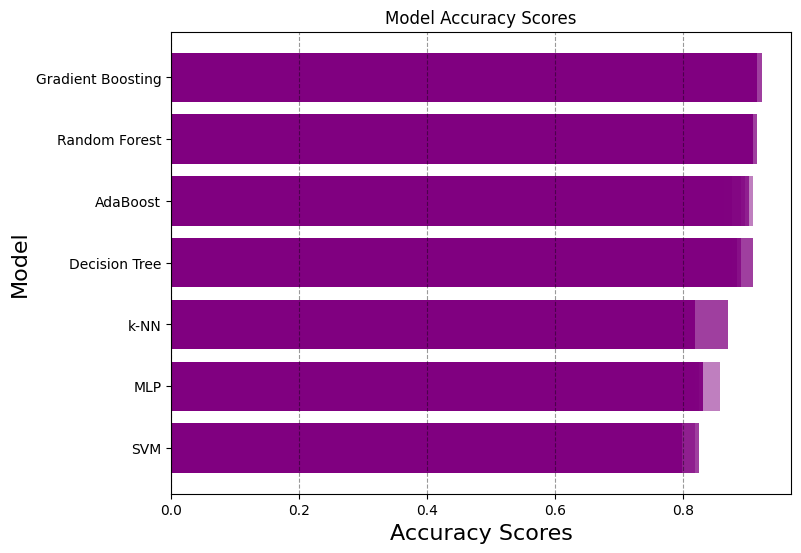

In [78]:
#Comparing model with best accurcy
fig, ax = plt.subplots(figsize=(8, 6))
x = classification_results['Accuracy']
y = classification_results['Classifier']
ax.barh(y, x, align='center', color='purple', alpha=0.5)
ax.invert_yaxis() 
ax.set_xlabel('Accuracy Scores', fontsize=16)
ax.set_ylabel('Model', rotation=90, fontsize=16)
ax.set_title('Model Accuracy Scores')
ax.xaxis.grid(True, linestyle='--', alpha=0.4, color='black')
plt.show()

### BEST CLASSIFICATION MODEL

In [79]:
#analysing best model
best_accuracy_row = classification_results[classification_results['Accuracy'] == classification_results['Accuracy'].max()]
best_accuracy_row

,Index,Classifier,Hyperparameter,Hyperparameter Value,Accuracy,Precision,Recall,F1-Score,ROC AUC,Fitting Time (s)
68,4,Gradient Boosting,n_estimators,300,0.922078,0.888889,0.851064,0.869565,0.902167,3.399756
67,4,Gradient Boosting,n_estimators,200,0.922078,0.888889,0.851064,0.869565,0.902167,2.318512


In [80]:
#Automatically selecting best model through accuracy 
best_classifier = best_accuracy_row.iloc[0]['Classifier']
print(f'Best Classifier: {best_classifier}')

Best Classifier: Gradient Boosting


In [81]:
#Automatically selecting best hyper parameters
best_hyperparameter = best_accuracy_row.iloc[0]['Hyperparameter']
#Automatically selecting value for hyper parameters
best_hyperparameter_value = best_accuracy_row.iloc[0]['Hyperparameter Value']

In [82]:
print(f' Best Hyperparameter :{best_hyperparameter}')
print(f' Best Hyperparameter value :{best_hyperparameter_value}')

 Best Hyperparameter :n_estimators
 Best Hyperparameter value :300


In [83]:
#declaring best classification model
clf = classifiers[best_classifier]
clf.set_params(**{best_hyperparameter: best_hyperparameter_value})

GradientBoostingClassifier(n_estimators=300)

In [84]:
#Training best fit model
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300)

In [85]:
#Making prediction
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0]


In [86]:
#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [87]:
#Saving Model results
random_forest_classifier_result = []


result_dict = {
    'Accuracy': round(accuracy, 2),
    'Precision': round(precision, 2),
    'Recall': round(recall, 2),
    'F1-Score': round(f1, 2),
    'ROC AUC': round(roc_auc, 2)
}


random_forest_classifier_result.append(result_dict)

In [88]:
# Create a DataFrame to display the results for all classifiers
random_forest_result = pd.DataFrame(random_forest_classifier_result)

In [89]:
#Printing best results
random_forest_result

,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,0.92,0.89,0.85,0.87,0.9


### ROC AND AUC CURVE

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

In [91]:
#prediction for roc & auc 
y_prob = clf.predict_proba(X_test)[:, 1]

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [93]:
roc_auc = roc_auc_score(y_test, y_prob)

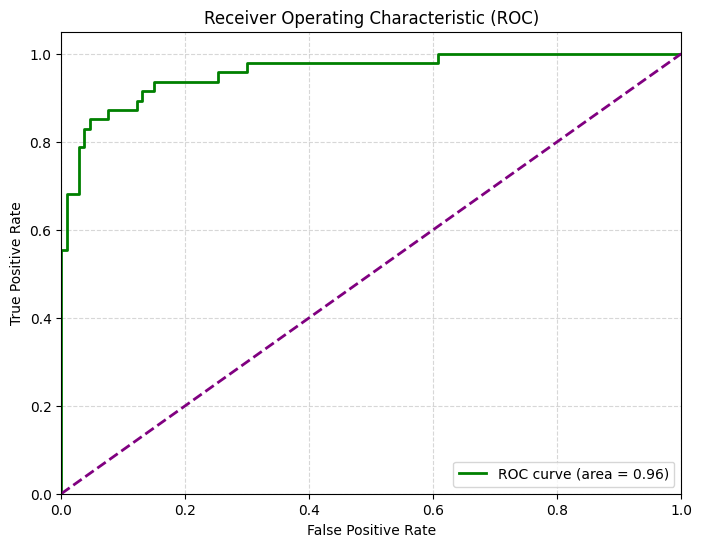

In [94]:
#Plotting roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

### CONFUSION MATRIX

In [95]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[102   5]
 [  7  40]]


In [96]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  102

True Negatives(TN) =  40

False Positives(FP) =  5

False Negatives(FN) =  7


Our model has 

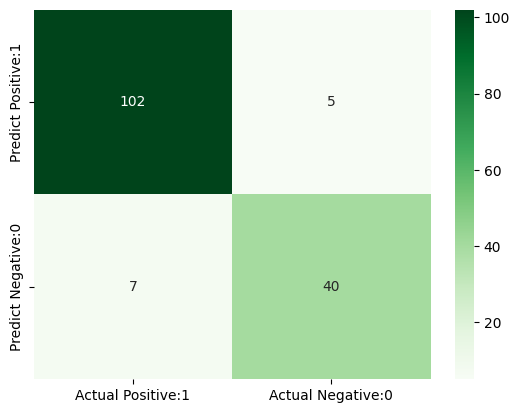

In [99]:
#plotting confusing matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=plt.cm.Greens)
plt.show()

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       107
           1       0.89      0.85      0.87        47

    accuracy                           0.92       154
   macro avg       0.91      0.90      0.91       154
weighted avg       0.92      0.92      0.92       154



In [101]:
# Indexing each value for analysis
TP = cm[0, 0]  # True Positives: Actual 0, Predicted 0
TN = cm[1, 1]  # True Negatives: Actual 1, Predicted 1
FP = cm[0, 1]  # False Positives: Actual 0, Predicted 1
FN = cm[1, 0]  # False Negatives: Actual 1, Predicted 0

### ACCURACY 

In [102]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(f'Classification accuracy : {round((classification_accuracy),4)}')

Classification accuracy : 0.9221


### CLASSIFICATION ERROR

In [103]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(f'Classification Error : {round((classification_error),4)}')

Classification Error : 0.0779


In [104]:
classification_accuracy + classification_error

1.0

### PRECISION 

In [105]:
precision = TP / (TP + FP)
print(f'Precision: {round(precision, 4)}')

Precision: 0.9533


### RECALL 

In [106]:
recall = TP / float(TP + FN)
print(f'Recall : {round((recall),4)}')

Recall : 0.9358


### TRUE POSITIVE RATE

In [107]:
true_positive = TP / float(TP + FN)
print(f'True Positive: {round((true_positive),4)}')

True Positive: 0.9358


### FALSE POSITIVE RATE

In [108]:
false_positive = FP / float(FP + TN)
print(f'False Positive : {round(false_positive,4)}')

False Positive : 0.1111


### SPECIFICITY

In [109]:
specificity = TN / (TN + FP)
print(f'Specificity : {round(specificity, 4)}')

Specificity : 0.8889


In [110]:
from sklearn.model_selection import cross_val_score

### CROSS VALIDATION

In [111]:
# Cross-validation scores 
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f'clf_model: Mean Accuracy : {scores.mean():.4f}')

clf_model: Mean Accuracy : 0.8518


### RESULT & CONCLUSION 

The confusion matrix shows 102 + 40 = 142 correct predictions

where, similarly 5 + 7 = 12 incorrect predictions

True Positives (Actual Positive:1 and Predict Positive:1) : 102

True Negatives (Actual Negative:0 and Predict Negative:0) : 40

False Positives (Actual Negative:0 but Predict Positive:1) : 5 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) : 7 (Type II error)

### REFERENCES:

For the Kaggle dataset you provided:

Kaggle. https://www.kaggle.com/code/faelk8/diabetes-eda-missing-values

### Github: https://github.com/AnalyticalHarry
### YouTube: https://www.youtube.com/@AnalyticalHarry

